<a href="https://colab.research.google.com/github/shreeshailaya/Python-/blob/master/Stock_Prediction_LSTM_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#LSTM Long Short Term Memory
#Past 60 days stock price



In [0]:
#libaries 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
#get stock quote
df= web.DataReader('RELIANCE.NS', data_source='yahoo', start='2012-01-01', end='2020-03-16')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,354.875000,343.575012,348.399994,353.274994,8598434.0,308.614227
2012-01-03,363.450012,355.174988,356.125000,362.325012,9366982.0,316.520142
2012-01-04,365.475006,356.674988,363.700012,358.075012,8476734.0,312.807434
2012-01-05,362.475006,347.049988,357.500000,349.750000,13239172.0,305.534882
2012-01-06,362.000000,348.325012,348.524994,358.774994,9406294.0,313.418945
...,...,...,...,...,...,...
2020-03-11,1178.449951,1108.000000,1108.000000,1153.550049,27237321.0,1153.550049
2020-03-12,1101.000000,1048.699951,1085.000000,1063.000000,25587823.0,1063.000000
2020-03-13,1140.000000,942.400024,998.000000,1105.300049,33509107.0,1105.300049


<function matplotlib.pyplot.show>

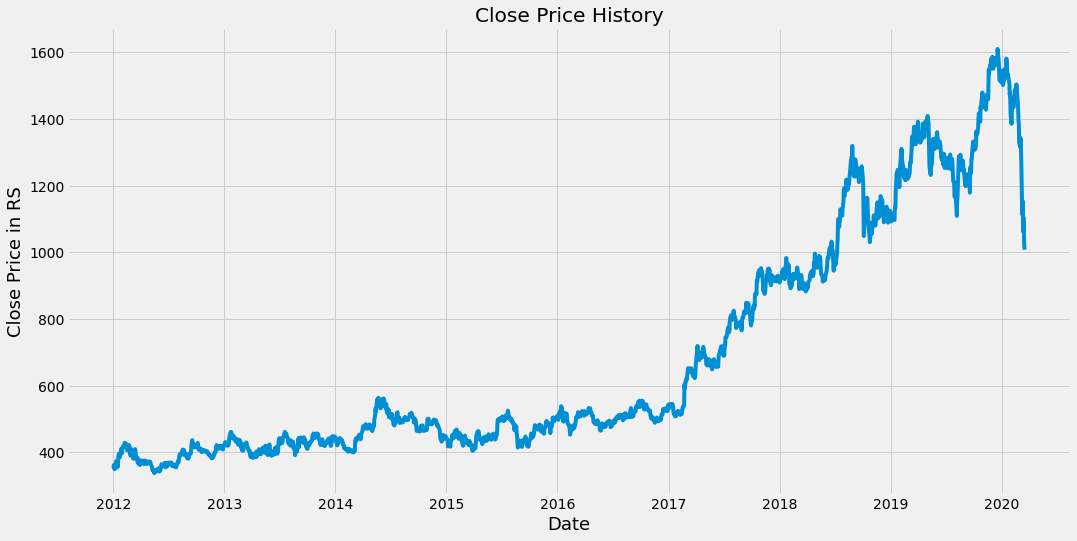

In [25]:
#visulization of closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in RS', fontsize=18)
plt.show

In [26]:
#create data frame with only the close
data=df.filter(['Close'])
#convert dataframe to numpy array
dataset=data.values
#Get the number of rows to tain the model on 80%
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1615

In [27]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data     

array([[0.01197029],
       [0.01908564],
       [0.01574418],
       ...,
       [0.60323145],
       [0.53278563],
       [0.52673169]])

In [28]:
#CREATE TRAINING DATASET
#CREATE SCALED TRAINING DATASET
train_data = scaled_data[0:training_data_len, :]
#SPLIT THE DATA INTO XTRAIN AND YTRAIN
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)

[array([0.01197029, 0.01908564, 0.01574418, 0.00919885, 0.01629453,
       0.01185236, 0.02362609, 0.02836309, 0.02390127, 0.02189638,
       0.01448622, 0.02592579, 0.04074614, 0.04306551, 0.0458173 ,
       0.03752261, 0.04231859, 0.04514901, 0.05672618, 0.04664283,
       0.05542889, 0.06097179, 0.06020522, 0.06376288, 0.06167939,
       0.06621984, 0.07166446, 0.06987578, 0.06570879, 0.06806747,
       0.06792989, 0.06311426, 0.05360093, 0.05586133, 0.06582672,
       0.06183664, 0.06427392, 0.05654927, 0.04141443, 0.04733078,
       0.05686376, 0.05301126, 0.05424955, 0.04772389, 0.03948817,
       0.03368976, 0.03840711, 0.04813665, 0.05654927, 0.0544068 ,
       0.04738975, 0.0378371 , 0.0310559 , 0.03319837, 0.03614672,
       0.02368504, 0.02671201, 0.02122808, 0.02160155, 0.0194984 ])]
[0.0190856396831508]
[array([0.01197029, 0.01908564, 0.01574418, 0.00919885, 0.01629453,
       0.01185236, 0.02362609, 0.02836309, 0.02390127, 0.02189638,
       0.01448622, 0.02592579, 0.0407

In [0]:
#CONVERT THE X_TRAIN AND Y_TRAIN TO NUMPY ARRAY
x_train = np.array(x_train)
y_train = np.array(y_train)

In [30]:
#RESHAPE THE DATA
#2D TO 3D
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1555, 60, 1)

In [0]:
#BUILD LSTM MODEL
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#COMPILE THE MODEL
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
#TRAIN THE MODELS
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1555/1555 [==============================] - 106s 68ms/step - loss: 8.6215e-04


In [0]:
#CREATE TESTING DATASET
#CREATE A ARRAY CONTAINING SCALED VALUES 
test_data = scaled_data[training_data_len - 60:, :]
#CREATE THE DATASET X_TEST AND Y_TEST
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#CONVERT DATA INTO NUMPY ARRAY
x_test = np.array(x_test)

In [0]:
#RESHAPE THE DATE
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [60]:
#Get the root mean squared error (RMSE)
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

46.38293636724464

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


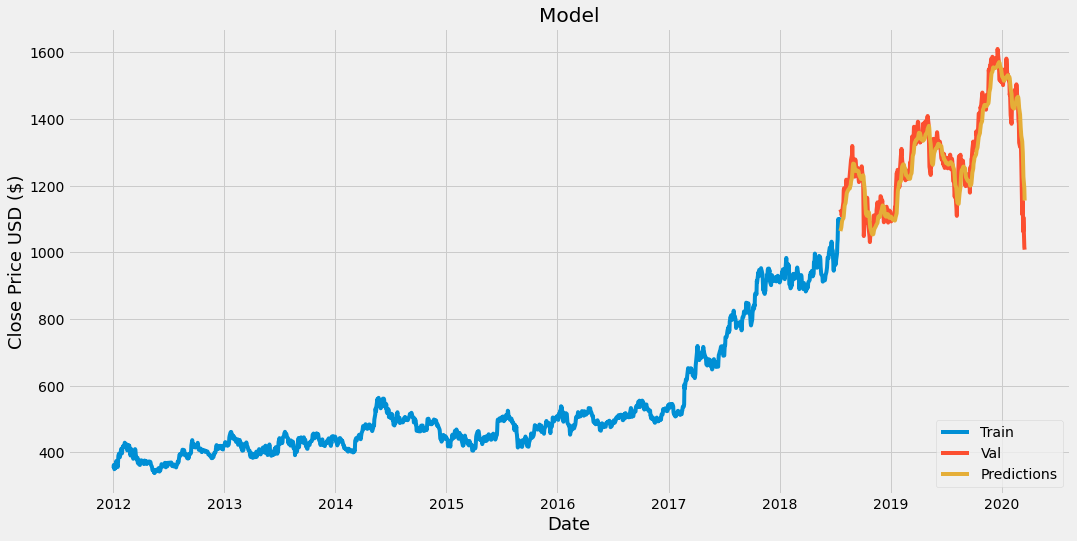

In [61]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [62]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-07-20,1128.650024,1063.771484
2018-07-23,1120.300049,1074.766724
2018-07-24,1110.949951,1084.099487
2018-07-25,1115.150024,1090.550049
2018-07-26,1110.650024,1095.385864
...,...,...
2020-03-11,1153.550049,1299.499512
2020-03-12,1063.000000,1266.197998
2020-03-13,1105.300049,1226.177856


In [64]:


#Get the quote
quote = web.DataReader('RELIANCE.NS', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)



[[1558.421]]


In [67]:


#Get the quote
quote2 = web.DataReader('RELIANCE.NS', data_source='yahoo', start='2020-03-17', end='2020-03-17')
print(quote2['Close'])



Date
2020-03-17    1008.0
2020-03-18     968.5
Name: Close, dtype: float64
